# Figure: Phase Shifts

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D, HandlerTuple
from matplotlib.ticker import MultipleLocator, AutoMinorLocator
import glob
import string
import re
%matplotlib inline

In [2]:
%run rc_params.py
%run constants.py
%run plot_helper.py

In [3]:
color_list = ['Oranges', 'Greens', 'Blues', 'Reds', 'Purples', 'Greys', 'plasma']
cmaps = [plt.get_cmap(name) for name in color_list]
colors = [cmap(0.55 - 0.1 * (i == 0)) for i, cmap in enumerate(cmaps)]

extended_colors=plt.get_cmap('tab20').colors
#define_color_latex()

In [4]:
files = glob.glob("data/DeltasFull*Zoom.txt")
headerNames = ["Energy", "K", "Kinv", "S", "Sinv", "T", 
               'Tinv', "hadamard*-30", "hadamard*-60", "hadamard*-90", "Mix", "Exact"]
df = pd.DataFrame()
for file in files:
    match = re.search(r"DeltasFull(.+)Zoom\.txt", file)
    data = pd.read_csv(file, skiprows=0, sep=' ', engine="python", names=headerNames)
    data["potential"]=match.group(1)
    df=pd.concat([df, data])
df.head()

,Energy,K,Kinv,S,Sinv,T,Tinv,hadamard*-30,hadamard*-60,hadamard*-90,Mix,Exact,potential
0,0.010000,20.177904,20.177902,20.177904,20.177904,20.177904,20.177902,20.177904,20.177904,20.177904,20.177904,20.177941,Chiral
1,0.511639,62.269716,62.269714,62.269716,62.269716,62.269716,62.269714,62.269716,62.269716,62.269716,62.269716,62.269751,Chiral
2,1.013278,64.540418,64.540416,64.540418,64.540418,64.540418,64.540416,64.540418,64.540418,64.540418,64.540418,64.540445,Chiral
3,1.514916,64.691549,64.691548,64.691549,64.691549,64.691549,64.691548,64.691549,64.691549,64.691549,64.691549,64.691572,Chiral
4,2.016555,64.265695,64.265694,64.265695,64.265695,64.265695,64.265694,64.265695,64.265695,64.265695,64.265695,64.265716,Chiral


## Plots

In [5]:
listKvp = ["K", "T", "Tinv", "Mix"]
def kvpLbl(string):
    if string == "Mix":
        return "mixed"
    lbl = string.replace("inv", "^{-1}")
    return f"${lbl}$"

def make_panel(ax, potential, pltType="phaseShift", xaxisLbl=True, yaxisLbl=True, tag=None):
    # plot different KVPs
    dataSet = df[df["potential"]==potential]
    for ikvp, kvp in enumerate(listKvp):
        y = dataSet[kvp] if pltType == "phaseShift" else np.abs(dataSet[kvp]-dataSet["Exact"])
        ax.plot(dataSet["Energy"], y, color=colors[ikvp], label=kvpLbl(kvp)) #, **lstyle)
    
    # for phase shifts: plot exact solution
    if pltType == "phaseShift":
        ax.plot(dataSet["Energy"], dataSet["Exact"], color="k", ls=":", label="exact") #, **lstyle)
    else: # for residuals, set log scale
        ax.set_yscale('log')
        
    # highlight anomalies
    styles = {"ls":":", "lw":1.2, "zorder":0}
    if potential == "Minnesota":
        ax.axvline(12.94, color=colors[0], **styles)
        ax.axvline(58.5, color=colors[2], **styles)
    elif potential == "Chiral":
        ax.axvline(60.92, color=colors[0], **styles)
    if potential == "WS":
        ax.axvline(8.38, color=colors[0], **styles)
    
        
    # place legend
    if pltType == "phaseShift" and potential == "WS":
        ax.legend(loc="center", ncol=1, frameon=True)
    
    # add tag for subplots
    ax.text(0.9, 0.1, f"({tag})", horizontalalignment='center',
            verticalalignment='center', transform=ax.transAxes)
    
    #
    if pltType == "phaseShift":
        if potential=="WS":
            lbl = "Woods-Saxon"
            chan = "d$_{5/2}$"
        else:
            lbl = potential
            chan = "${}^1$S$_0$"
        ax.set_title(f"{lbl} potential: {chan}")
    
    # set axis labels
    if yaxisLbl:
        if pltType == "phaseShift":
            ax.set_ylabel(r"Phase Shift [deg]")
        else:
            ax.set_ylabel(r"Abs. Residual [deg]")
        
    if xaxisLbl:
        ax.set_xlabel(r"Energy $E$ [MeV]")

    # set axis limits
    if potential == "WS":
        ax.set_xlim(0, 10)
    else:
        ax.set_xlim(0,120)
        
    if potential == "Minnesota" and pltType == "residual":
        ax.set_ylim(1e-3,1e1)    
    
    if potential == "Chiral" and pltType == "residual":
        ax.set_ylim(5e-7,5e-4)
        
    if potential == "WS":
        if pltType == "residual":
            ax.set_ylim(5e-8,5e-1)
        else:
            ax.set_ylim(0, 170)
    
    # set ticks
    ax.xaxis.set_ticks_position('both')
    ax.yaxis.set_ticks_position('both') 
    #ax.xaxis.set_minor_locator(AutoMinorLocator(n=5))
    ax.minorticks_on()
    #ax.yaxis.set_minor_locator(AutoMinorLocator(n=5))
    #ax.tick_params(width=0.7, which='major')

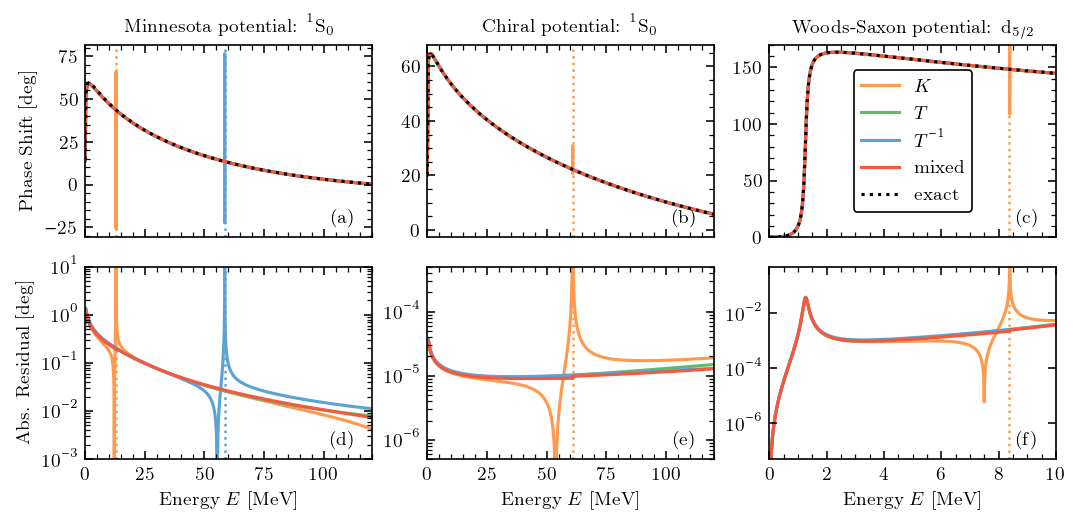

In [6]:
potentials = ["Minnesota", "Chiral", "WS"]
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(18*cm,8.6*cm), constrained_layout=True, sharex='col')

alphabet = string.ascii_lowercase

index = 0
for irow, axRows in enumerate(axs):
    pltType = "residual" if irow else "phaseShift"
    xaxisLbl = bool(irow)
    for icol, ax in enumerate(axRows):
        yaxisLbl = not bool(icol)
        make_panel(ax, potential=potentials[icol], 
                   pltType=pltType, xaxisLbl=xaxisLbl, yaxisLbl=yaxisLbl, tag=alphabet[index])
        index+=1

fileName = "phase_shifts.pdf"
fig.savefig(fileName)